In [ ]:
pip

In [5]:
import numpy as np 
import pandas as pd

In [ ]:
df = pd.read_csv('grocerydb.csv')

In [64]:
df.head(5)

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3.0,2.79,0.055973,90.7184,1.098901,0.549451,13.186813,7.692308,2.197802,0.010989,0.000000
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0.0,2.49,0.019213,90.7184,5.494505,7.692308,15.384615,8.791209,3.296703,0.000000,0.000000
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3.0,4.99,0.017781,396.8930,3.030303,1.010101,14.141414,6.060606,2.020202,0.050505,0.005051


In [65]:
df[['Protein','Total Fat','Carbohydrate','Sugars, total','Sodium','Fiber, total dietary','Cholesterol']].iloc[0].sum()

29.383838383

In [66]:
print(df.columns)
print()
print(df.info())

Index(['name', 'store', 'category', 'brand', 'FPro', 'FPro_class', 'price',
       'price percal', 'package_weight', 'Protein', 'Total Fat',
       'Carbohydrate', 'Sugars, total', 'Fiber, total dietary', 'Sodium',
       'Cholesterol'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  26250 non-null  object 
 1   store                 26250 non-null  object 
 2   category              26250 non-null  object 
 3   brand                 26181 non-null  object 
 4   FPro                  26250 non-null  float64
 5   FPro_class            26250 non-null  float64
 6   price                 22220 non-null  float64
 7   price percal          20780 non-null  float64
 8   package_weight        24975 non-null  float64
 9   Protein               26250 non-null  float64
 10  Total Fat    

In [108]:
df_cats  = df.groupby(by='category')[['price','Protein','Total Fat','Carbohydrate','Sugars, total','Sodium','Fiber, total dietary','Cholesterol']].mean()

In [109]:
df_cats_size = df.groupby(by='category')[['Protein','Total Fat','Carbohydrate','Sugars, total','Sodium','Fiber, total dietary','Cholesterol']].size()
print(df_cats_size.sort_values(ascending=False))

category
prepared-meals-dishes      2043
pastry-chocolate-candy     1529
snacks-bars                1402
cookies-biscuit            1228
snacks-mixes-crackers      1116
produce-packaged           1107
produce-beans-wf           1071
cheese                     1011
snacks-chips                978
ice-cream-dessert           907
meat-packaged               898
dairy-yogurt-drink          831
cereal                      800
bread                       689
sauce-all                   662
rolls-buns-wraps            659
soup-stew                   622
dressings                   574
sausage-bacon               466
snacks-dips-salsa           453
cakes                       404
milk-milk-substitute        402
drink-juice                 391
baking                      382
seafood                     372
pizza                       372
snacks-nuts-seeds           357
drink-shakes-other          309
spread-squeeze              301
breakfast                   289
meat-poultry-wf             274

In [110]:
df2 = pd.DataFrame(df_cats_size)

In [111]:
df2.rename(columns={0:'Count'},inplace=True)
df2.reset_index()

,category,Count
0,baby-food,126
1,baking,382
2,bread,689
3,breakfast,289
4,cakes,404
5,cereal,800
6,cheese,1011
7,coffee-beans-wf,126
8,cookies-biscuit,1228
9,culinary-ingredients,194


In [112]:
df_cats.sort_values(by='Sugars, total',ascending = False, inplace = True)
print(df_cats.head(10))

                           price    Protein  Total Fat  Carbohydrate  \
category                                                               
pastry-chocolate-candy  4.036599   5.968492  24.428236     59.360412   
cookies-biscuit         3.891454   5.413935  19.407403     61.675685   
cakes                   5.601062   3.812273  17.926579     49.180493   
pudding-jello           2.925643   2.790213   5.107701     31.547147   
culinary-ingredients    4.913174   1.073606  35.761145     30.588448   
snacks-bars             7.764474  16.242717  18.523540     51.709138   
baking                  4.203786   8.441010  12.971675    116.000347   
spread-squeeze          6.162922  13.079643  33.369001     33.813918   
ice-cream-dessert       4.429986   3.404550  12.872844     32.914520   
cereal                  4.348554  10.245519   9.065059     72.634049   

                        Sugars, total    Sodium  Fiber, total dietary  \
category                                                      

In [118]:
df_cats = df_cats.merge(df2,left_on='category',right_on='category',how='inner')

In [119]:
df_cats.reset_index(inplace=True)
df_cats.sort_values(by='Count',ascending=False,inplace=True,ignore_index=True)

In [120]:
df_cats

,category,price,Protein,Total Fat,Carbohydrate,"Sugars, total",Sodium,"Fiber, total dietary",Cholesterol,Count
0,prepared-meals-dishes,4.944088,8.778541,7.714210,24.470031,3.213817,0.418739,1.909048,0.022301,2043
1,pastry-chocolate-candy,4.036599,5.968492,24.428236,59.360412,39.490070,0.166450,4.777536,0.019492,1529
2,snacks-bars,7.764474,16.242717,18.523540,51.709138,22.557986,0.481686,8.678395,0.004955,1402
3,cookies-biscuit,3.891454,5.413935,19.407403,61.675685,30.648365,0.316701,2.897132,0.018121,1228
4,snacks-mixes-crackers,3.634414,9.584123,16.541370,63.923872,10.441529,0.702245,4.110957,0.007145,1116
5,produce-packaged,3.432184,2.737473,3.996584,19.520358,9.037920,0.806048,2.941295,0.001428,1107
6,produce-beans-wf,3.573017,3.429117,0.787450,19.125045,5.941667,8.445600,3.912010,0.000083,1071
7,cheese,4.645843,19.350028,24.839163,4.627508,1.560618,1.292371,0.214896,0.177476,1011
8,snacks-chips,3.386820,8.913645,27.303850,57.907110,4.187794,0.643640,5.027450,0.004384,978
9,ice-cream-dessert,4.429986,3.404550,12.872844,32.914520,20.741669,0.235821,1.255056,0.228282,907


In [122]:
df['Protein_Price'] = df['price']/df['Protein']

In [96]:
top_20 = df_cats[['category','Count']].head(20)

In [97]:
top_20

,category,Count
0,prepared-meals-dishes,2043
1,pastry-chocolate-candy,1529
2,snacks-bars,1402
3,cookies-biscuit,1228
4,snacks-mixes-crackers,1116
5,produce-packaged,1107
6,produce-beans-wf,1071
7,cheese,1011
8,snacks-chips,978
9,ice-cream-dessert,907


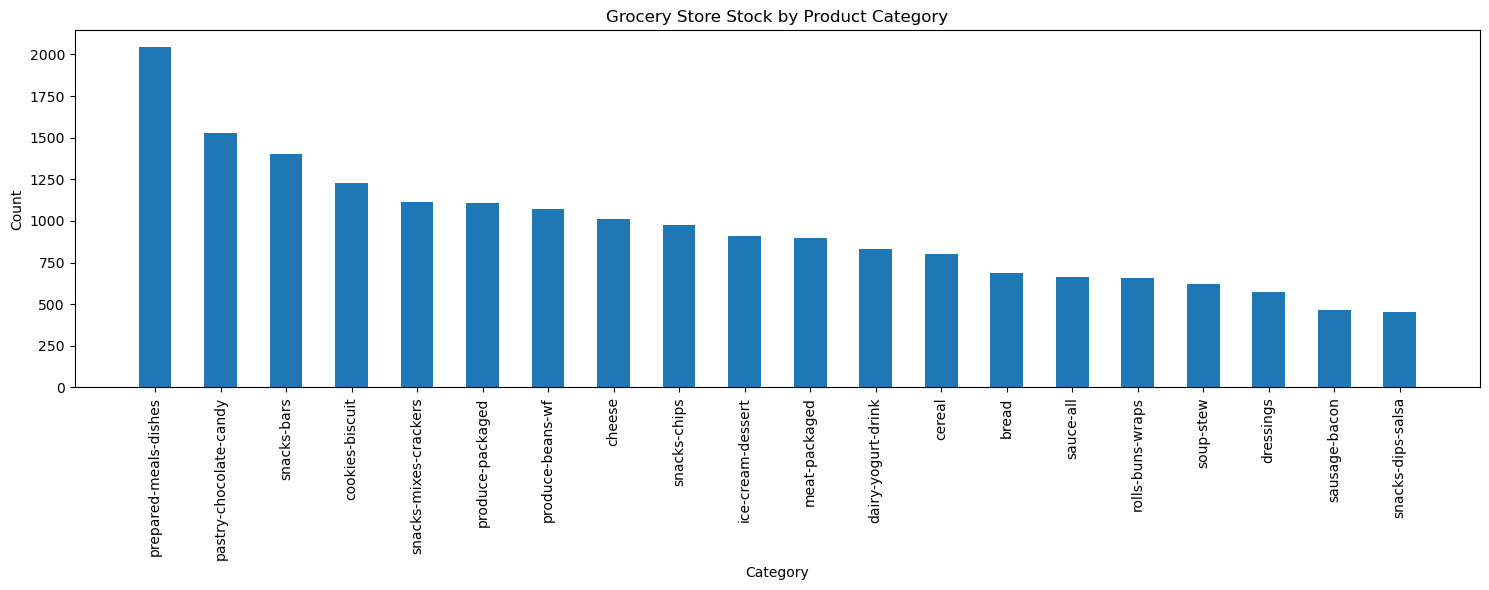

In [103]:
plt.figure(figsize=(15, 6))
plt.bar(top_20['category'],top_20['Count'],width=.5)
#plt.axis([min(min(eps_1_dperc['quarter']),min(eps_2_dperc['quarter']))+pd.DateOffset(months=-1),max(max(eps_1_dperc['quarter']),max(eps_2_dperc['quarter']))+pd.DateOffset(months=1),y_min_perc-.1,y_max_perc+.1])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title(f"Grocery Store Stock by Product Category")
plt.tight_layout()  



In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  26250 non-null  object 
 1   store                 26250 non-null  object 
 2   category              26250 non-null  object 
 3   brand                 26181 non-null  object 
 4   FPro                  26250 non-null  float64
 5   FPro_class            26250 non-null  float64
 6   price                 22220 non-null  float64
 7   price percal          20780 non-null  float64
 8   package_weight        24975 non-null  float64
 9   Protein               26250 non-null  float64
 10  Total Fat             26250 non-null  float64
 11  Carbohydrate          26250 non-null  float64
 12  Sugars, total         26241 non-null  float64
 13  Fiber, total dietary  26241 non-null  float64
 14  Sodium                26250 non-null  float64
 15  Cholesterol        

Text(0, 0.5, 'Sugar Content')

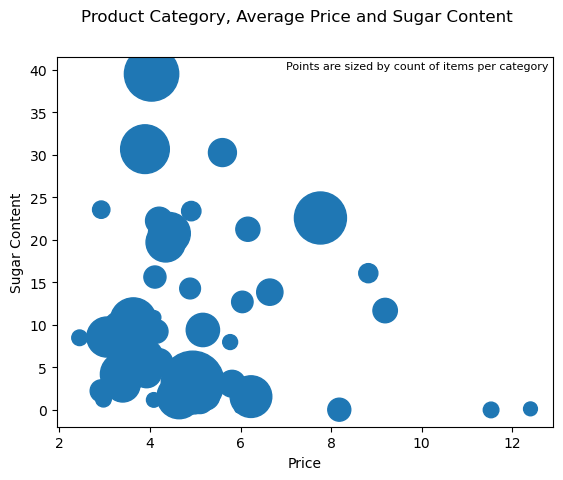

In [176]:
plt.scatter(df_cats['price'],df_cats['Sugars, total'],sizes=df_cats['Count'])
plt.suptitle(f"Product Category, Average Price and Sugar Content")
plt.text(7,40,'Points are sized by count of items per category', fontsize=8)
plt.xlabel("Price")
plt.ylabel("Sugar Content")

In [151]:
Price_Mean = df['price'].mean()
Price_std = df['price'].std()

Q3_Price= df['price'].quantile(q=.75)
Q2_Price = df['price'].quantile(q=.25)

Price_Top = Price_Mean + 1.5*(Q3_Price)
Price_Bottom = Price_Mean - 1.5*(Q2_Price)

df_filt = df.loc[(df['price']>=Price_Bottom) & (df['price']<=Price_Top)]
#BGO_CSE_filt = BGO_CSE.loc[(BGO_CSE['SPEND']>=1)]

df_filt.info()



<class 'pandas.core.frame.DataFrame'>
Index: 21277 entries, 0 to 26249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  21277 non-null  object 
 1   store                 21277 non-null  object 
 2   category              21277 non-null  object 
 3   brand                 21227 non-null  object 
 4   FPro                  21277 non-null  float64
 5   FPro_class            21277 non-null  float64
 6   price                 21277 non-null  float64
 7   price percal          19895 non-null  float64
 8   package_weight        20200 non-null  float64
 9   Protein               21277 non-null  float64
 10  Total Fat             21277 non-null  float64
 11  Carbohydrate          21277 non-null  float64
 12  Sugars, total         21269 non-null  float64
 13  Fiber, total dietary  21269 non-null  float64
 14  Sodium                21277 non-null  float64
 15  Cholesterol           21

In [153]:
protein_mean = df_filt['Protein'].mean()
protein_std = df_filt['Protein'].std()

Q3_Protein= df_filt['Protein'].quantile(q=.75)
Q2_Protein = df_filt['Protein'].quantile(q=.25)

Protein_Top = protein_mean + 1.5*(Q3_Protein)
Protein_Bottom = protein_mean - 1.5*(Q2_Protein)

df_filt = df_filt.loc[(df_filt['Protein']>=Protein_Bottom) & (df_filt['Protein']<=Protein_Top)]

In [149]:
protein_mean

8.593887411583593

In [154]:
df_prep = df[df['category']=='prepared-meals-dishes']

In [156]:
protein_mean = df_prep['Cholesterol'].mean()
protein_std = df_prep['Protein'].std()

Q3_Protein= df_prep['Cholesterol'].quantile(q=.75)
Q2_Protein = df_prep['Cholesterol'].quantile(q=.25)

Protein_Top = protein_mean + 1.5*(Q3_Protein)
Protein_Bottom = protein_mean - 1.5*(Q2_Protein)

df_filt = df_prep.loc[(df_filt['Cholesterol']>=Protein_Bottom) & (df_prep['Cholesterol']<=Protein_Top)]

Text(0, 0.5, 'Cholesterol')

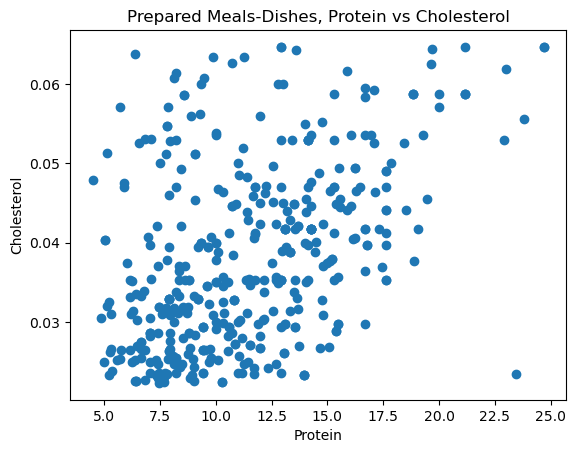

In [160]:
plt.scatter(df_filt['Protein'],df_filt['Cholesterol'])
plt.title(f"Prepared Meals-Dishes, Protein vs Cholesterol")
plt.xlabel("Protein")
plt.ylabel("Cholesterol")